In [1]:
import keras as k
from keras.applications.vgg16 import VGG16
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def plot_history(hst, title = ''):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.grid()

    plt.tight_layout()

    plt.suptitle(title)
    plt.show()

In [3]:
from keras.datasets import fashion_mnist
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

PART 1 - Create Сonvolutional Neural Network

In [ ]:
model_hw_09 = k.models.Sequential([
      k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
      k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
      k.layers.Dropout(0.3),
      k.layers.Dense(256, activation = 'softplus', name = 'Hidden_2'),
      k.layers.Dense(10, activation = 'softmax', name = 'Output'),
  ],
  name="model_hw_09")

model_hw_09.compile(
      loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=k.optimizers.Nadam(learning_rate=0.0002),
      metrics=['accuracy']
    )

model_hw_09.fit(
        x_train,
        y_train,
        epochs=15,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=1,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

train_loss, train_acc = model_hw_09.evaluate(x_train, y_train)
test_loss, test_acc = model_hw_09.evaluate(x_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6535 - loss: 1.0489 - val_accuracy: 0.8215 - val_loss: 0.5026
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8245 - loss: 0.4976 - val_accuracy: 0.8440 - val_loss: 0.4404
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8462 - loss: 0.4339 - val_accuracy: 0.8511 - val_loss: 0.4145
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8555 - loss: 0.4076 - val_accuracy: 0.8524 - val_loss: 0.4095
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8610 - loss: 0.3891 - val_accuracy: 0.8601 - val_loss: 0.3846
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8661 - loss: 0.3745 - val_accuracy: 0.8619 - val_loss: 0.3843
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8717 - loss: 0.3594 - val_accuracy: 0.8702 - val_loss: 0.3666
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8738 - loss: 0.3475 - val_accuracy: 0.8661 - val_

In [ ]:
model = k.models.Sequential([
    k.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu'),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu'),
    k.layers.Flatten(),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10, activation='softmax')
], name="model_hw_10")

model.compile(
    loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_model =model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=3, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
    ],
)

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


Epoch 1/30


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.7288 - loss: 0.7438 - val_accuracy: 0.8603 - val_loss: 0.3860
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8758 - loss: 0.3414 - val_accuracy: 0.8877 - val_loss: 0.3144
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8960 - loss: 0.2850 - val_accuracy: 0.8921 - val_loss: 0.2958
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9089 - loss: 0.2506 - val_accuracy: 0.8885 - val_loss: 0.2982
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9150 - loss: 0.2310 - val_accuracy: 0.9032 - val_loss: 0.2662
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9230 - loss: 0.2078 - val_accuracy: 0.9063 - val_loss: 0.2638
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9309 - loss: 0.1879 - val_accuracy: 0.9059 - val_loss: 0.2673
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9372 - loss: 0.1691 - val_accurac

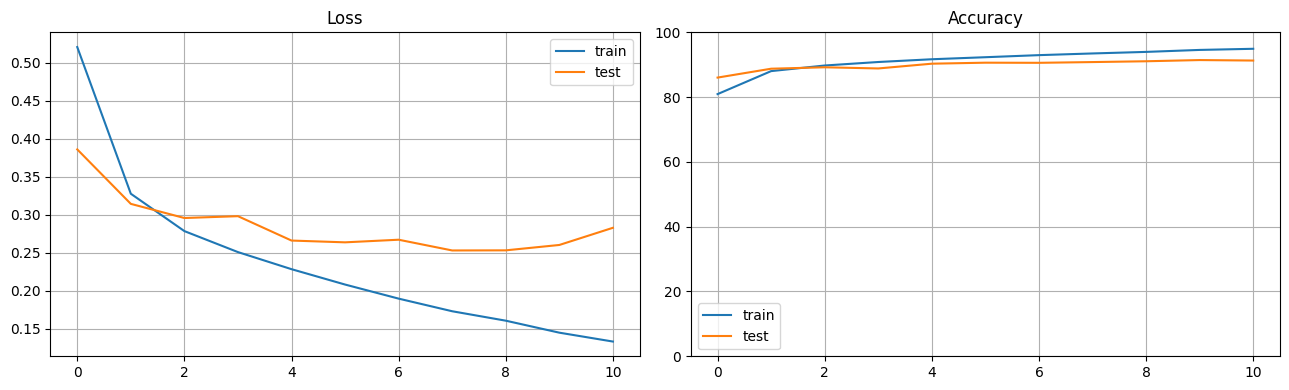

In [ ]:
plot_history(history_model)

In [ ]:
model = k.models.Sequential([
    k.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu'),
    k.layers.Flatten(),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10, activation='softmax')
], name="model_hw_10_padding")

model.compile(
    loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_model =model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=3, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
    ],
)

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.7524 - loss: 0.6656 - val_accuracy: 0.8769 - val_loss: 0.3397
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8934 - loss: 0.2966 - val_accuracy: 0.8964 - val_loss: 0.2886
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9113 - loss: 0.2426 - val_accuracy: 0.9083 - val_loss: 0.2500
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9213 - loss: 0.2151 - val_accuracy: 0.9132 - val_loss: 0.2345
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9318 - loss: 0.1847 - val_accuracy: 0.9147 - val_loss: 0.2380
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9375 - loss: 0.1662 - val_accuracy: 0.9125 - val_loss: 0.2323
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9476 - loss: 0.1427 - val_accuracy: 0.9167 - val_loss: 0.2321
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9547 - loss: 0.1214 - val_accurac

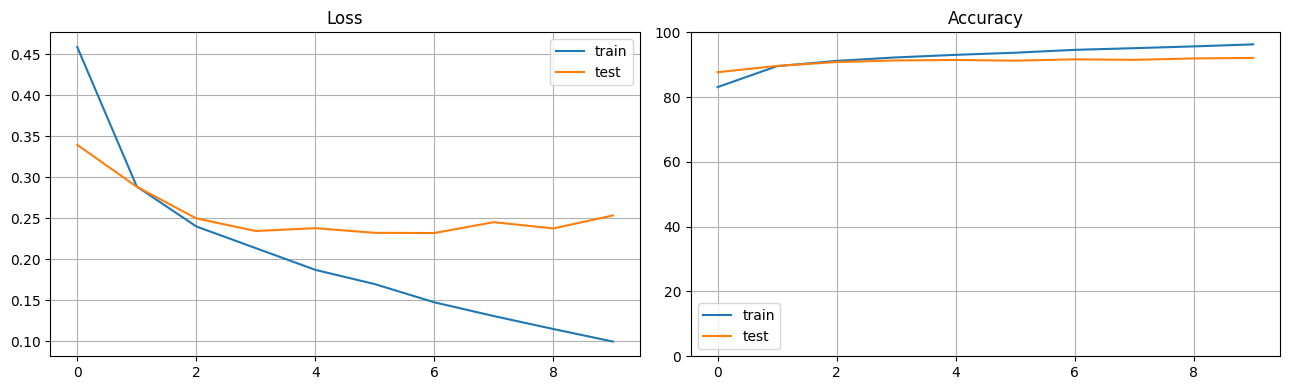

In [ ]:
plot_history(history_model)

In [ ]:
model = k.models.Sequential([
    k.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=k.regularizers.l2(0.001)),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu'),
    k.layers.Flatten(),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10, activation='softmax')
], name="model_hw_10_padding_regularizer")

model.compile(
    loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_model =model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=3, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
    ],
)

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

Epoch 1/30


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 31ms/step - accuracy: 0.7560 - loss: 0.7012 - val_accuracy: 0.8712 - val_loss: 0.3791
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.8873 - loss: 0.3337 - val_accuracy: 0.8855 - val_loss: 0.3316
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9029 - loss: 0.2872 - val_accuracy: 0.8975 - val_loss: 0.2952
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9151 - loss: 0.2496 - val_accuracy: 0.9064 - val_loss: 0.2700
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9229 - loss: 0.2278 - val_accuracy: 0.9098 - val_loss: 0.2605
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9268 - loss: 0.2112 - val_accuracy: 0.9166 - val_loss: 0.2473
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9350 - loss: 0.1939 - val_accuracy: 0.9163 - val_loss: 0.2548
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9393 - loss: 0.1815 - val_accurac

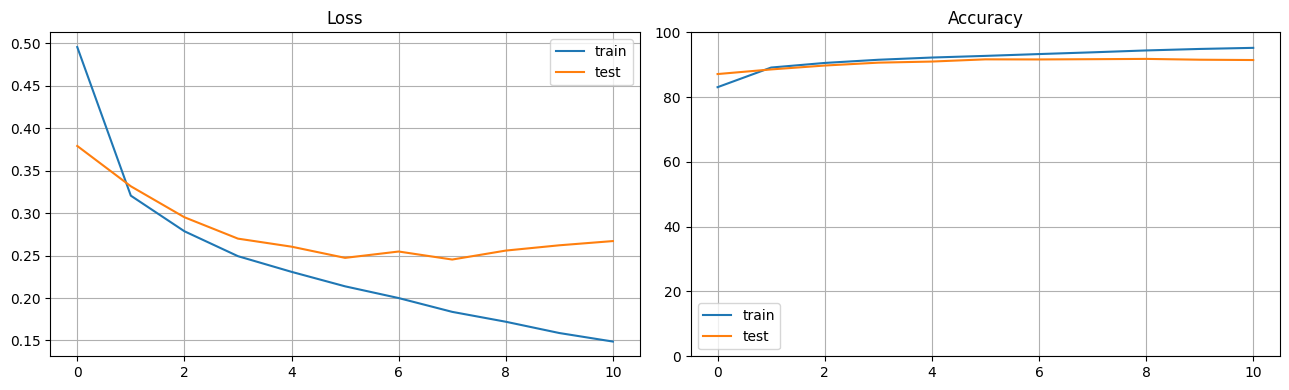

In [ ]:
plot_history(history_model)

In [ ]:
model = k.models.Sequential([
    k.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=k.regularizers.l2(0.002)),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu'),
    k.layers.Flatten(),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10, activation='softmax')
], name="model_hw_10_padding_regularizer_2")

print(model.summary())

model.compile(
    loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_model =model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=3, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
    ],
)

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

Model: "model_hw_10_padding_regularizer_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,962 (1023.29 KB)

 Trainable params: 261,962 (1023.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.7618 - loss: 0.7105 - val_accuracy: 0.8598 - val_loss: 0.4033
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.8888 - loss: 0.3361 - val_accuracy: 0.8888 - val_loss: 0.3232
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9027 - loss: 0.2888 - val_accuracy: 0.9010 - val_loss: 0.2885
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9119 - loss: 0.2570 - val_accuracy: 0.8949 - val_loss: 0.3023
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9216 - loss: 0.2341 - val_accuracy: 0.9096 - val_loss: 0.2704
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9289 - loss: 0.2190 - val_accuracy: 0.9066 - val_loss: 0.2775
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9313 - loss: 0.2040 - val_accuracy: 0.9137 - val_loss: 0.2683
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9338 - loss: 0.19

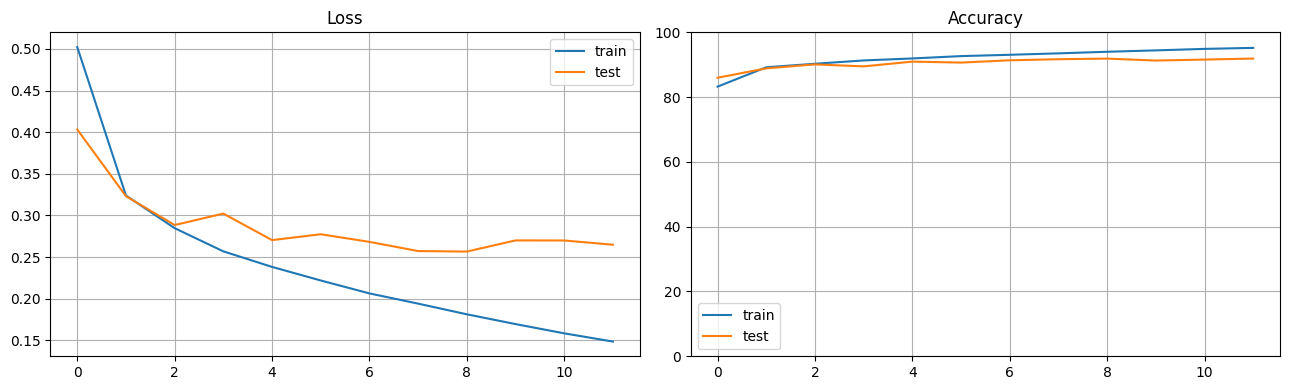

In [ ]:
plot_history(history_model)

In [ ]:
model.save("model_hw_10_padding_regularizer_2.keras")

In [ ]:
model = k.models.Sequential([
    k.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=k.regularizers.l2(0.05)),
    k.layers.MaxPooling2D((2, 2)),
    k.layers.Conv2D(64, (3, 3), activation='relu'),
    k.layers.Flatten(),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10, activation='softmax')
], name="model_hw_10_padding_regularizer_3")

print(model.summary())

model.compile(
    loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_model =model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=3, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
    ],
)

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model_hw_10_padding_regularizer_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,962 (1023.29 KB)

 Trainable params: 261,962 (1023.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.7380 - loss: 1.0447 - val_accuracy: 0.8575 - val_loss: 0.4247
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8668 - loss: 0.4041 - val_accuracy: 0.8649 - val_loss: 0.3926
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8818 - loss: 0.3532 - val_accuracy: 0.8839 - val_loss: 0.3513
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8922 - loss: 0.3237 - val_accuracy: 0.8885 - val_loss: 0.3408
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8995 - loss: 0.3014 - val_accuracy: 0.8866 - val_loss: 0.3357
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9083 - loss: 0.2791 - val_accuracy: 0.8994 - val_loss: 0.3066
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9104 - loss: 0.2668 - val_accuracy: 0.9006 - val_loss: 0.3010
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9159 - loss: 0.2555 - val_accurac

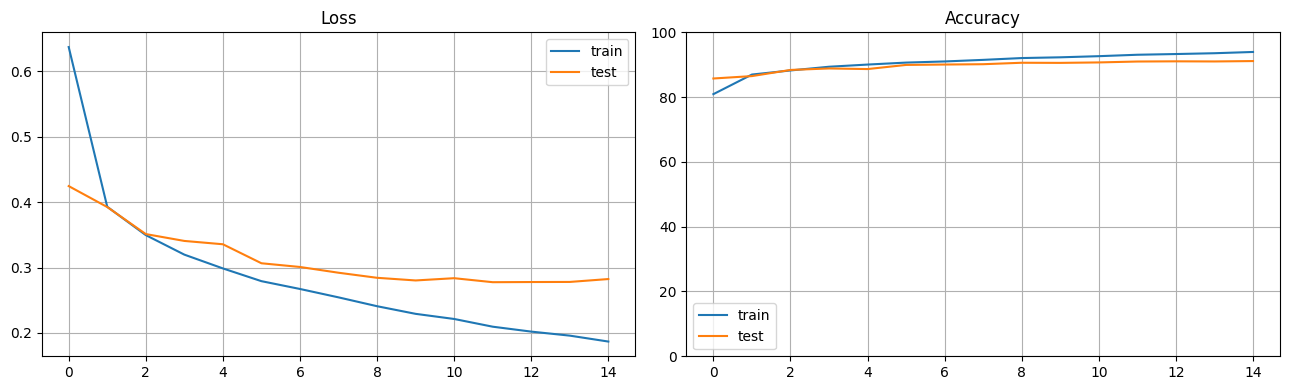

In [ ]:
plot_history(history_model)

RESUME

Як бачимо - навідь при застосуванні не налаштованоі згортковоі мережі точність одразу зростає. ( Test accuracy: 0.873199999332428 - для мережі з  попередньго завданняб проти  Test accuracy: 0.9082000255584717 ). Однак також бачимо перенавчання моделі і спробувалі підібраті більш якісни параметри. Як мені здаеться це вдолося зробити в моделі (model_hw_10_padding_regularizer_2) з виікорістанням регулярізатора L2 (з значеннням 0,002) та вкорістовуючі padding (same) перешіх слоях Conv2D. У цьому випадку отрималі показники  Test accuracy: 0.9189000129699707, і начебто не має перенавчання (хоча)

PART 2- Use VGG16 as base

In [21]:
rgb_images_train = np.repeat(x_train, 3, axis=-1)
rgb_images_validate = np.repeat(x_test, 3, axis=-1)


conv_base = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3),
)

conv_base.trainable = False

model = k.models.Sequential([
    k.layers.Resizing(32, 32, interpolation="nearest", input_shape=(28, 28, 3)),
    conv_base,
    k.layers.Flatten(),
    k.layers.Dense(256, activation="relu"),
    k.layers.Dense(10, activation="softmax"),
], name = "model_hw_10_VGG16")

model.compile(
    loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy']
)

history_model =model.fit(
    rgb_images_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(rgb_images_validate, y_test),
    verbose=1,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=3, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
    ],
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 939s 999ms/step - accuracy: 0.7702 - loss: 0.6571 - val_accuracy: 0.8359 - val_loss: 0.4450
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 883s 941ms/step - accuracy: 0.8527 - loss: 0.4056 - val_accuracy: 0.8501 - val_loss: 0.4116
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 934s 954ms/step - accuracy: 0.8648 - loss: 0.3666 - val_accuracy: 0.8576 - val_loss: 0.3908
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 928s 961ms/step - accuracy: 0.8711 - loss: 0.3425 - val_accuracy: 0.8627 - val_loss: 0.3818
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 950s 991ms/step - accuracy: 0.8766 - loss: 0.3281 - val_accuracy: 0.8704 - val_loss: 0.3647
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 917s 978ms/step - accuracy: 0.8844 - loss: 0.3124 - val_accuracy: 0.8599 - val_loss: 0.3840
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 911s 966ms/step - accuracy: 0.8905 - loss: 0.2986 - val_accuracy: 0.8674 - val_loss: 0.3647
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 914s 957ms/step - accuracy: 0.8943 -

In [22]:
test_loss, test_acc = model.evaluate(rgb_images_validate, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 136s 433ms/step - accuracy: 0.8708 - loss: 0.3550


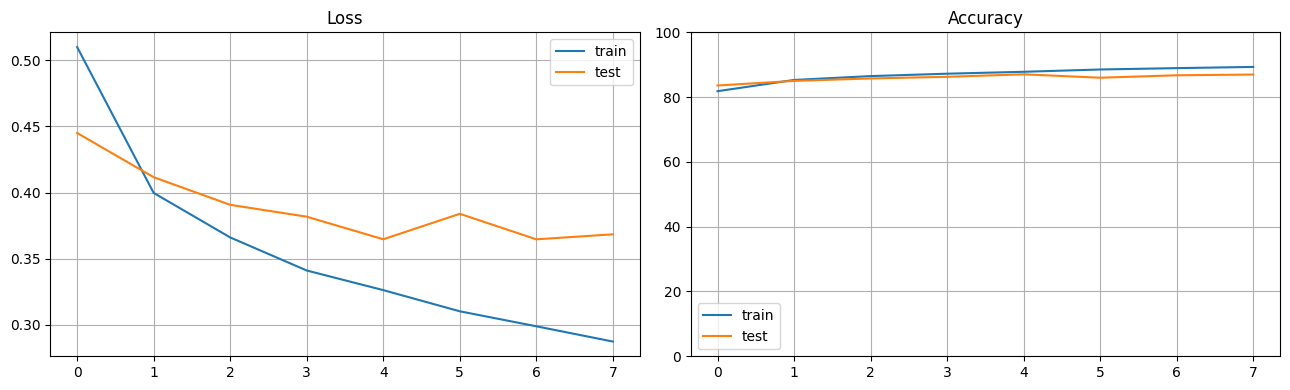

In [23]:
plot_history(history_model)

In [5]:
conv_base = VGG16(
    weights="imagenet",
    include_top=False,
)

conv_base.trainable = False

set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary(show_trainable=True)

model = k.models.Sequential([
    k.layers.InputLayer(input_shape=(28, 28, 1)),
    k.layers.Resizing(32, 32, interpolation="nearest"),
    k.layers.Conv2D(3, (1, 1), use_bias=False, padding="same", kernel_initializer="ones"),
    conv_base,
    k.layers.Flatten(),
    k.layers.Dense(256, activation="relu"),
    k.layers.Dense(10, activation="softmax"),
], name = "model_hw_10_VGG16_")

model.summary(show_trainable=True)

model.compile(
    loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(learning_rate=0.0002),
    metrics=['accuracy']
)

history_model =model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=3, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
    ],
)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, None, None, 3) │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, None, None,    │      1,792 │   N   │
│                             │ 64)                   │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, None, None,    │     36,928 │   N   │
│                             │ 64)                   │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, None, None,    │          0 │   -   │
│                             │ 64)                   │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, None, None,    │     73,856 │   N   │
│                             │ 128)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, None, None,    │    147,584 │   N   │
│                             │ 128)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, None, None,    │          0 │   -   │
│                             │ 128)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, None, None,    │    295,168 │   N   │
│                             │ 256)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, None, None,    │    590,080 │   N   │
│                             │ 256)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, None, None,    │    590,080 │   N   │
│                             │ 256)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, None, None,    │          0 │   -   │
│                             │ 256)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, None, None,    │  1,180,160 │   N   │
│                             │ 512)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, None, None,    │  2,359,808 │   N   │
│                             │ 512)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, None, None,    │  2,359,808 │   N   │
│                             │ 512)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, None, None,    │          0 │   -   │
│                             │ 512)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, None, None,    │  2,359,808 │   Y   │
│                             │ 512)                  │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, None, None,    │  2,359,808 │   Y   │
│                             │ 512)                  │            │     

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "model_hw_10_VGG16_"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ resizing (Resizing)         │ (None, 32, 32, 1)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d (Conv2D)             │ (None, 32, 32, 3)     │          3 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ vgg16 (Functional)          │ (None, 1, 1, 512)     │ 14,714,688 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 512)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 256)           │    131,328 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 10)            │      2,570 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,848,589 (56.64 MB)

 Trainable params: 7,213,325 (27.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/20


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 1264s 1s/step - accuracy: 0.8167 - loss: 0.5066 - val_accuracy: 0.8866 - val_loss: 0.3146
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1272s 1s/step - accuracy: 0.8928 - loss: 0.2907 - val_accuracy: 0.8844 - val_loss: 0.3157
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1211s 1s/step - accuracy: 0.9075 - loss: 0.2482 - val_accuracy: 0.8975 - val_loss: 0.2785
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1302s 1s/step - accuracy: 0.9178 - loss: 0.2235 - val_accuracy: 0.8995 - val_loss: 0.2778
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1307s 1s/step - accuracy: 0.9248 - loss: 0.2033 - val_accuracy: 0.9049 - val_loss: 0.2605
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1262s 1s/step - accuracy: 0.9299 - loss: 0.1853 - val_accuracy: 0.9066 - val_loss: 0.2689
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1223s 1s/step - accuracy: 0.9333 - loss: 0.1740 - val_accuracy: 0.8987 - val_loss: 0.2964
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1271s 1s/step - accuracy: 0.9381 - loss: 0.1611 - val_accurac

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 194ms/step - accuracy: 0.9131 - loss: 0.2608
Test accuracy: 0.9132999777793884


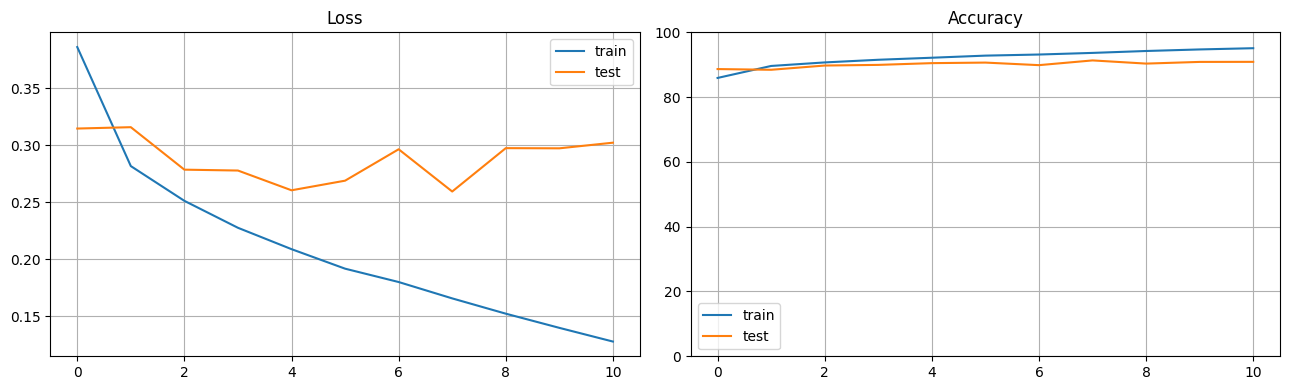

In [7]:
plot_history(history_model)

RESUME

У данному випадку модєль з початку має достатьню точність але після виялення ознак та донавчавння отрималли точність 0.92.
Але час який був на це затрачений дужє великій (В мене декілька разів завісало - і почінати з початку дуже болістно). Як що порівняти з першою частіною завдання - затрачений час не вартий 0,003%  (Мабуть я щось зробив не так як треба, або це на данному датасеті так працює. Як що такі алгорітми працювання з нейронимі мережамі існують - то це не просто так)
